# Exploratory Data Analysis (EDA) & Data Cleaning for House Pricing Dataset

## Data Loading & Initial Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

In [3]:
file_path = "raw_house_data.csv"  
df = pd.read_csv(file_path)

In [4]:
# Initial exploration

In [5]:
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64

In [6]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [7]:
df.tail()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4,4.0,4317.0,NaN,"Compactor, Dishwasher, Double Sink, Island, Ap...",3,"Carpet, Mexican Tile",NaN


In [8]:
df.shape

(5000, 16)

In [9]:
df.count()

MLS                 5000
sold_price          5000
zipcode             5000
longitude           5000
latitude            5000
lot_acres           4990
taxes               5000
year_built          5000
bedrooms            5000
bathrooms           4994
sqrt_ft             4944
garage              4993
kitchen_features    4967
fireplaces          5000
floor_covering      4999
HOA                 4438
dtype: int64

In [10]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


## Data Cleaning

### Data Type Conversion

In [11]:
convert_cols = ["bathrooms", "sqrt_ft", "garage", "fireplaces", "HOA"]
for col in convert_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Handle missing values

In [12]:
df.fillna({"lot_acres":df["lot_acres"].median()}, inplace=True)
df.fillna({"sqrt_ft":df["sqrt_ft"].median()}, inplace=True)
df.fillna({"garage": 0}, inplace=True)
df.fillna({"HOA": 0}, inplace=True)

<Axes: xlabel='sold_price'>

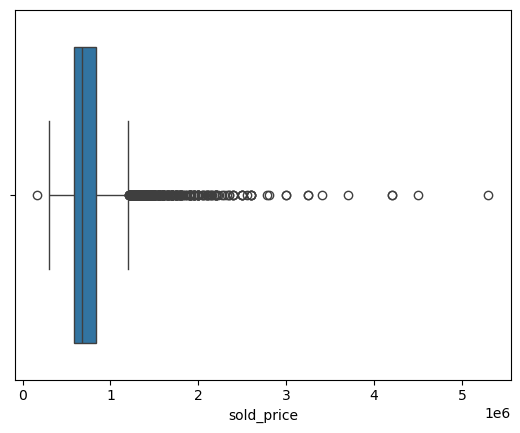

In [13]:
sns.boxplot(x=df['sold_price'])

<Axes: xlabel='HOA'>

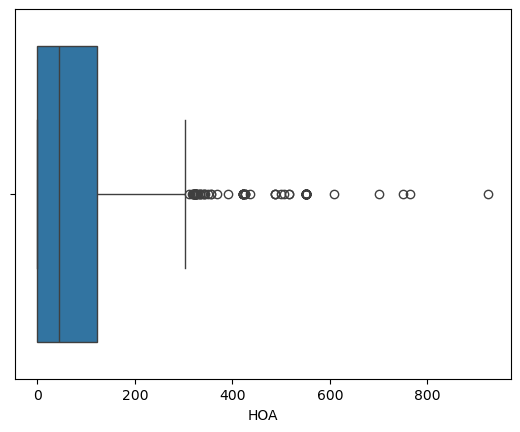

In [14]:
sns.boxplot(x=df['HOA'])

## Outlier Removal using IQR method

In [15]:
column = df.select_dtypes(include=['float64', 'int64']).columns

In [16]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [17]:
outlier_cols = ["lot_acres", "sold_price", "taxes", "sqrt_ft", "HOA"]
for col in outlier_cols:
    df = remove_outliers(df, col)

In [18]:
# Summary Statistics After Cleaning:

In [19]:
print("\nSummary Statistics After Cleaning:")
print(df.describe())


Summary Statistics After Cleaning:
                MLS    sold_price       zipcode    longitude     latitude  \
count  3.733000e+03  3.733000e+03   3733.000000  3733.000000  3733.000000   
mean   2.135377e+07  6.837639e+05  85726.135548  -110.916177    32.324772   
std    2.101180e+06  1.362301e+05     32.688514     0.092688     0.134497   
min    3.042851e+06  3.750000e+05  85118.000000  -111.430863    31.458609   
25%    2.140831e+07  5.750000e+05  85718.000000  -110.975535    32.285978   
50%    2.161784e+07  6.500000e+05  85737.000000  -110.922752    32.319066   
75%    2.180678e+07  7.500000e+05  85750.000000  -110.861144    32.396889   
max    2.192856e+07  1.185000e+06  85935.000000  -109.861617    34.314889   

        lot_acres         taxes   year_built     bedrooms    bathrooms  \
count  3733.00000   3733.000000  3733.000000  3733.000000  3729.000000   
mean      1.06910   6006.996552  1992.924993     3.850522     3.600697   
std       0.84015   2092.235652    49.317624    

In [20]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
398,21329440,1125000.0,85718,-110.883547,32.329763,1.33,8654.00,1986,4,5.0,5023.0,3.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",3.0,"Carpet, Natural Stone, Wood",179.0
400,21500337,1100000.0,85750,-110.866891,32.321968,1.17,6565.93,1994,4,4.0,3870.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Natural Stone",58.0
411,21206450,1180000.0,85750,-110.868487,32.316324,1.30,9590.16,1993,4,3.0,5029.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Carpet, Ceramic Tile",40.0
412,21224755,1175500.0,85718,-110.940650,32.347873,1.23,11674.00,2004,4,5.0,4143.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",159.0
428,21703603,1125478.0,85755,-110.973498,32.460529,1.71,3171.39,2017,3,4.0,3436.0,3.0,"Dishwasher, Garbage Disposal",1.0,"Carpet, Natural Stone",0.0


In [21]:
#df = df.drop(columns=['kitchen_features','floor_covering'])

In [22]:
print(df)

           MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
398   21329440   1125000.0    85718 -110.883547  32.329763       1.33   
400   21500337   1100000.0    85750 -110.866891  32.321968       1.17   
411   21206450   1180000.0    85750 -110.868487  32.316324       1.30   
412   21224755   1175500.0    85718 -110.940650  32.347873       1.23   
428   21703603   1125478.0    85755 -110.973498  32.460529       1.71   
...        ...         ...      ...         ...        ...        ...   
4992   3056450    525000.0    85614 -110.980945  31.824287       3.01   
4993  21908358    565000.0    85750 -110.820216  32.307646       0.83   
4994  21909379    535000.0    85718 -110.922291  32.317496       0.18   
4996  21908591    550000.0    85750 -110.858556  32.316373       1.42   
4998  21900515    550000.0    85745 -111.055528  32.296871       1.01   

         taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage  \
398    8654.00        1986         4        5.0   5023.

# Save cleaned dataset

In [23]:
df.to_csv("cleaned_house_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_house_data.csv'.")


Cleaned dataset saved as 'cleaned_house_data.csv'.


# Data Visualization

### Bar Chart
Used to compare categorical values such as sold price,lot acres.

<Axes: xlabel='sold_price'>

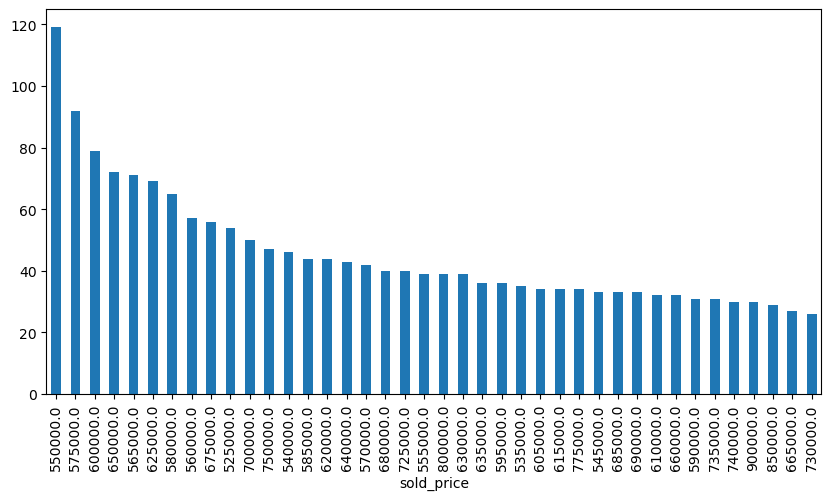

In [24]:
df.sold_price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

df.lot_acres.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

### Histogram of Sold Prices
- House prices were right-skewed, meaning some high-value properties affected the average.

- Suggested log transformation to normalize data for better model accuracy.

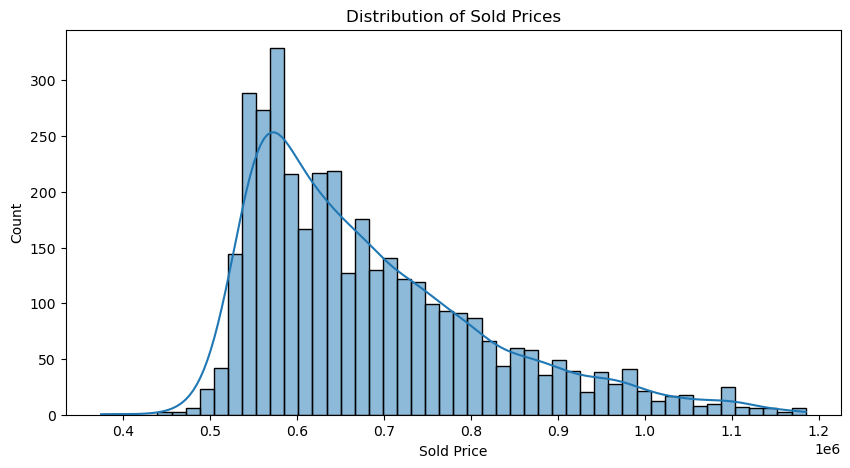

In [25]:

plt.figure(figsize=(10, 5))
sns.histplot(df["sold_price"], bins=50, kde=True) #Kernel Density Estimation
plt.title("Distribution of Sold Prices")
plt.xlabel("Sold Price")
plt.ylabel("Count")
plt.show()

### Boxplot of Lot Acres
Shows data distribution & outliers using quartiles.
- Before cleaning, several extreme outliers were identified in house prices.

- After applying IQR-based filtering, the data became more consistent and normally distributed.

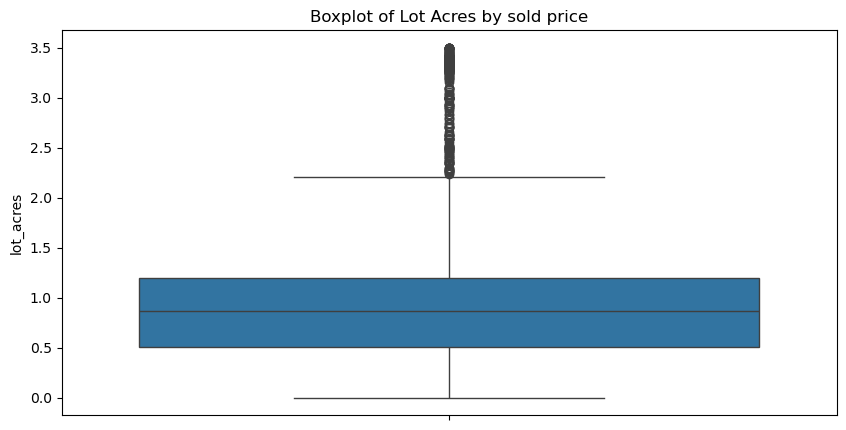

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["lot_acres"])
plt.title("Boxplot of Lot Acres by sold price")
plt.show()

### Correlation Heatmap
Helps identify feature relationships to select relevant predictors for modeling.

- Square footage, number of rooms, and overall quality had the highest correlation with house prices.

- Lot size had weak correlation, indicating it might not be a strong predictor.

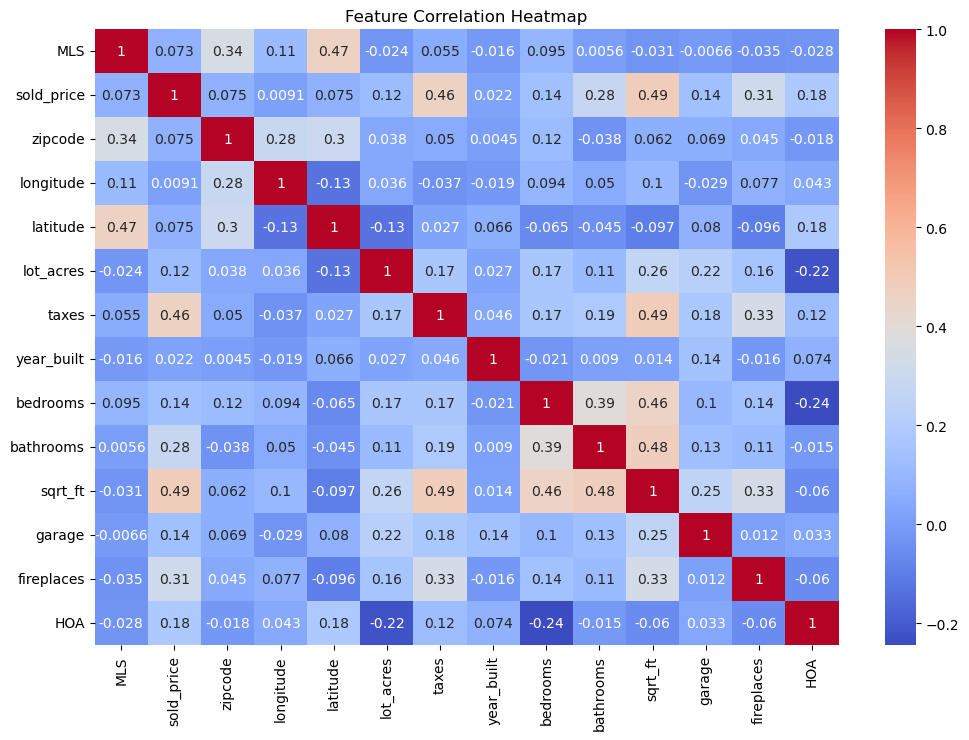

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[column].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Scatter plot of Square Footage vs Price
A scatter plot is used to visualize the relationship between house size (square footage) and sold price. This helps identify whether larger homes tend to have higher prices.

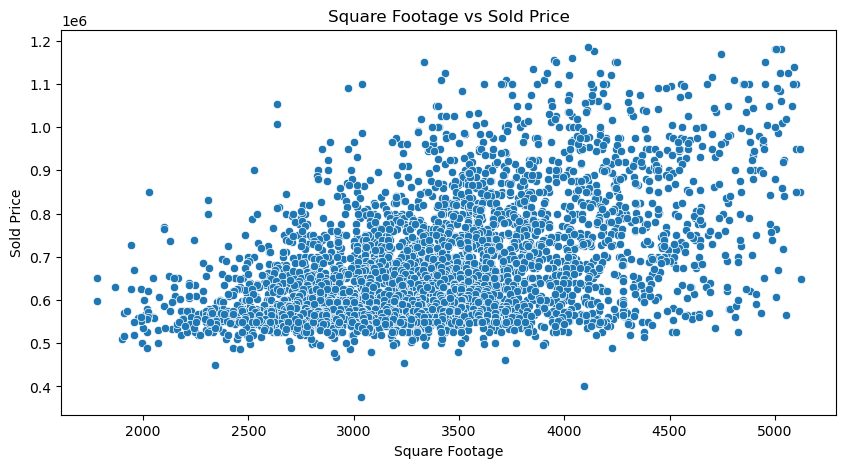

In [28]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["sqrt_ft"], y=df["sold_price"])
plt.title("Square Footage vs Sold Price")
plt.xlabel("Square Footage")
plt.ylabel("Sold Price")
plt.show()

### Count Plot of Number of Bedrooms
A count plot is used to visualize the distribution of houses based on the number of bedrooms. This helps identify the most common house types in the dataset.

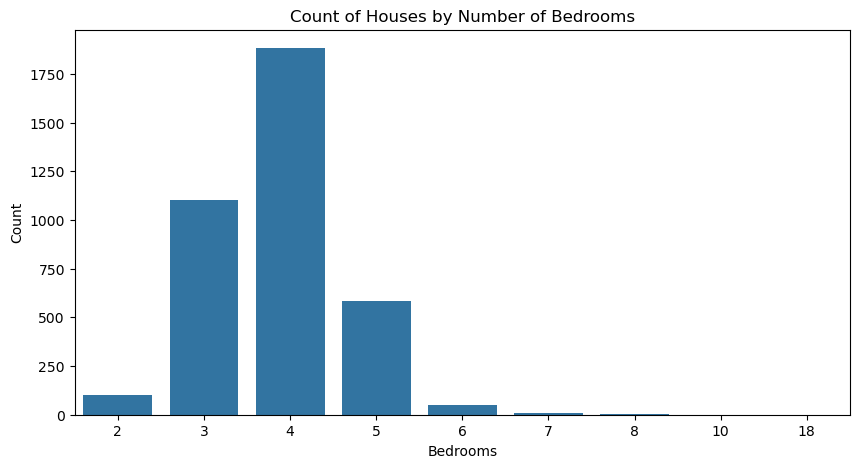

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["bedrooms"])
plt.title("Count of Houses by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

### PairPlot of Selected Features
Displays pairwise relationships between multiple numerical variables.

- House price vs. square footage showed a strong positive correlation (larger homes tend to be more expensive).

- Year built vs. price suggested that newer homes generally have higher prices.

- Outliers were visible in some features like lot size.

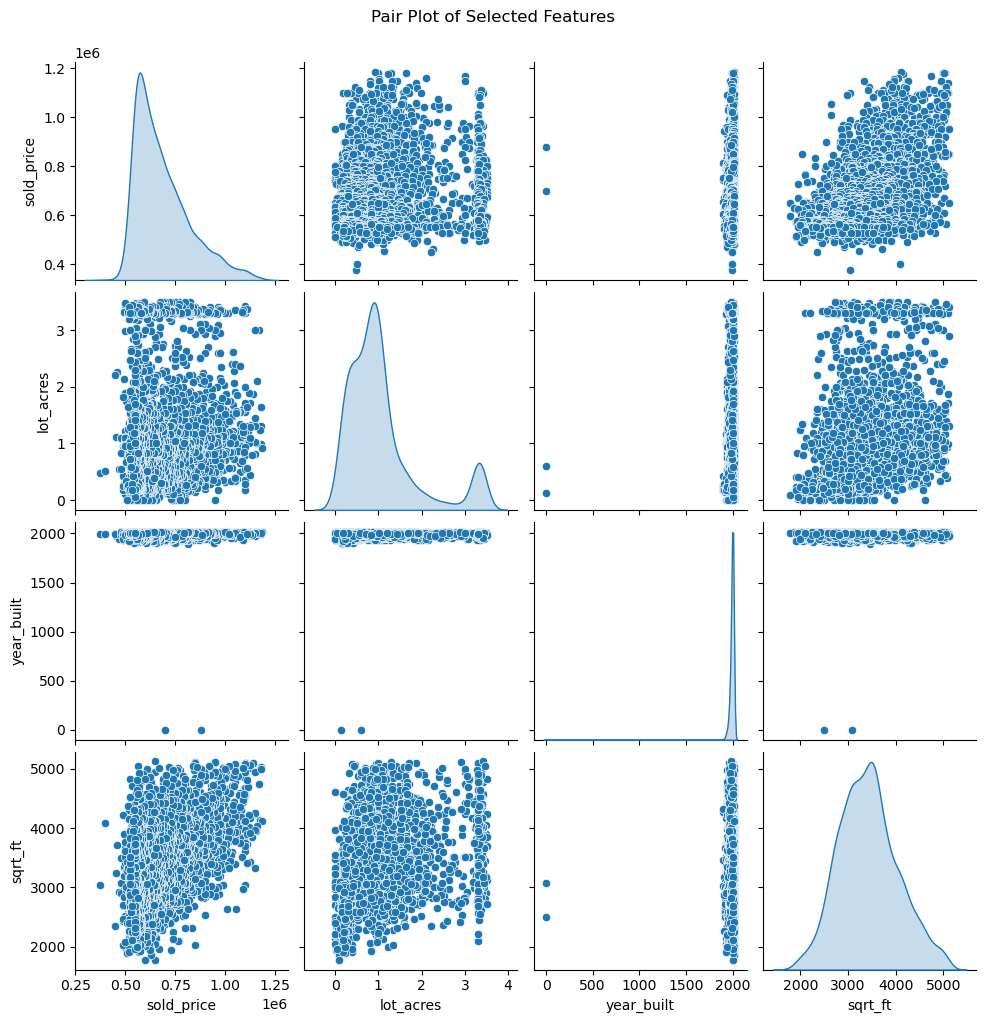

In [30]:
selectedColumn = ['sold_price','lot_acres','year_built','sqrt_ft']
sns.pairplot(df[selectedColumn], diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()